In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('C:/Users/USER/Documents/Udemy Python for Finance/83 Computing Alpha, Beta, and R Squared in Python/Python 3/Housing.xlsx')

In [3]:
data

House Price  House Size (sq.ft.) State  Number of Rooms  \
0       1116000                 1940    IN                8   
1        860000                 1300    IN                5   
2        818400                 1420    IN                6   
3       1000000                 1680    IN                7   
4        640000                 1270    IN                5   
5       1010000                 1850    IN                7   
6        600000                 1000    IN                4   
7        700000                 1100   LA                 4   
8       1100000                 1600   LA                 7   
9        570000                 1000    NY                5   
10       860000                 2150    NY                9   
11      1085000                 1900    NY                9   
12      1250000                 2200    NY                9   
13       850000                 1100    TX                4   
14       640000                  860    TX                4   
15       900000                 1325    TX                6   
16       730000                 1350    TX                6   
17       750000                 1600    TX                6   
18       650000                  950    TX                2   
19       680000                 1250    TX                4   

    Year of Construction  
0                   2002  
1                   1992  
2                   1987  
3                   2000  
4                   1995  
5                   1998  
6                   2015  
7                   2014  
8                   2017  
9                   1997  
10                  1997  
11                  2000  
12                  2014  
13                  2017  
14                  1997  
15                  1997  
16                  2000  
17                  1992  
18                  1987  
19                  2000

In [4]:
data[['House Price', 'House Size (sq.ft.)']]

House Price  House Size (sq.ft.)
0       1116000                 1940
1        860000                 1300
2        818400                 1420
3       1000000                 1680
4        640000                 1270
5       1010000                 1850
6        600000                 1000
7        700000                 1100
8       1100000                 1600
9        570000                 1000
10       860000                 2150
11      1085000                 1900
12      1250000                 2200
13       850000                 1100
14       640000                  860
15       900000                 1325
16       730000                 1350
17       750000                 1600
18       650000                  950
19       680000                 1250

### Univariate Regression

In [5]:
X = data['House Size (sq.ft.)']
Y = data['House Price']

In [6]:
X

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [7]:
Y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

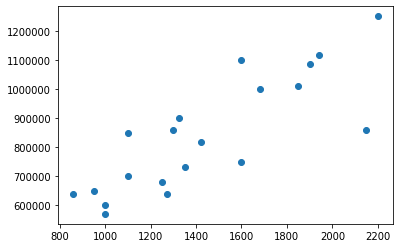

In [8]:
plt.scatter(X,Y)
plt.show()

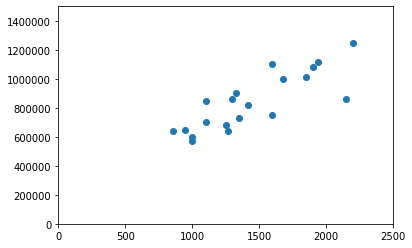

In [9]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.show()

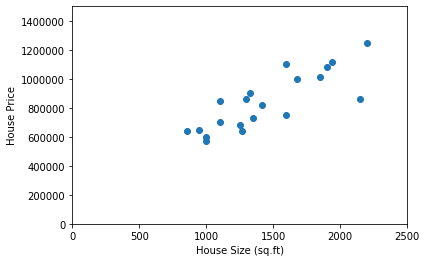

In [10]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft)')
plt.show()

In [11]:
# Assign the newly obtained information which is the object X and the constant to a new variable (X1)
X1 = sm.add_constant(X)

# The output of an ordinary least squares regression OLS
# As arguments we must add the dependent variable Y and the newly defined x 1 
# fit method: a method that will apply a specific estimation technique to obtain the full fit of the model.
reg = sm.OLS(Y, X1).fit()

In [12]:
# Display the OLS (Ordinary Least Squares) regression results and organize them in three tables.
# R-squared = 0.678 ; the independent variable in our regression house size can explain 68 percent of the dependent variable.
# const >< coef = 2.608e+05 ~ 260,800 = alpha
# -->> In fact it is also the intercept in our regression. This means when we draw the regression line the starting point of that line 
#on the y axis will be 260,800.
# House Size >< coef = $402 = beta = the slope of the regression line: for every square foot increase of the size of a house its price 
#is expected to rise by four hundred and two dollars namely. 
# Standard Error $65 : this augmentation of $402 will typically vary within a range of $65.
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Mon, 11 May 2020   Prob (F-statistic):           8.13e-06
Time:                        20:00:18   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Expected value of Y:

In [13]:
# A house with a size of 1000 square feet to equal Alpha which is 260 thousand eight hundred dollars plus beta which is equal to 
#$420 times 1000 
# There are 2 1000-square-feet houses whose prices are only slightly lower than the one we predicted $662,800.
# Therefore our prediction fits well with the actual data.
260800 + 402 * 1000

662800

### Alpha, Beta, R^2:

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [15]:
slope

401.91628631922595

In [16]:
# (alpha)
intercept 

260806.2360560964

In [17]:
r_value

0.8235775534696924

In [18]:
# R-squared statistic
r_value ** 2

0.678279986579124

In [19]:
p_value

8.129642377231308e-06

In [20]:
std_err

65.24299510636492